# Phase 3 
## Group - Nidhi Vraj, Hanish, Sagar Bhodagi, Srinivas Vaddi

### Import statements

In [9]:
# as the model runs there may be a 
# scope for minor warnings
# adding the below lines to avoid the same
import warnings

warnings.simplefilter('ignore')

# jupyternotebook packages

# important packages
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline

# official packages
from time import time
import json

from numpy import sqrt
from numpy import vstack

from pandas import read_csv

# importing packages from sklearn

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Lasso, Ridge

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, roc_auc_score

# import packages from torch

from torch import Tensor
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Module
from torch.nn import BCELoss
from torch.nn import MSELoss
from torch.nn.init import kaiming_uniform_, xavier_uniform_
from torch.optim import SGD
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch.nn import Linear
from torch.utils.tensorboard import SummaryWriter


In [10]:
le = LabelEncoder()
lr = LinearRegression()
scaler = MinMaxScaler()
writer = SummaryWriter()

### Read data from application_train dataset

In [11]:
data = pd.read_csv('/application_train.csv')
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Splitting target and features

In [12]:
y = data['TARGET']
X = data.drop(['SK_ID_CURR','TARGET'], axis = 1)

### Removing null values from data and discarding features with more that 40% null data

In [13]:
null_values_from_data = X.isna().sum().reset_index().rename(columns={'index':'ncol_name',0:'null_count'})
null_values_from_data['count_%'] = null_values_from_data['null_count']/len(X)*100
null_values_from_data = null_values_from_data[null_values_from_data['count_%'] <= 30]
null_values_from_data

,ncol_name,null_count,count_%
0,NAME_CONTRACT_TYPE,0,0.000000
1,CODE_GENDER,0,0.000000
2,FLAG_OWN_CAR,0,0.000000
3,FLAG_OWN_REALTY,0,0.000000
4,CNT_CHILDREN,0,0.000000
...,...,...,...
115,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
116,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
117,AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
118,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631


In [14]:
selected_columns_from_data = null_values_from_data['ncol_name'].tolist() + ['TARGET']
print(selected_columns_from_data)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DO

In [15]:
null_values_from_data['ncol_type'] = null_values_from_data['ncol_name'].apply(lambda x: X[x].dtype)
null_values_from_data[null_values_from_data['count_%'] > 0]

,ncol_name,null_count,count_%,ncol_type
7,AMT_ANNUITY,12,0.003902,float64
8,AMT_GOODS_PRICE,278,0.090403,float64
9,NAME_TYPE_SUITE,1292,0.420148,object
27,CNT_FAM_MEMBERS,2,0.000650,float64
40,EXT_SOURCE_2,660,0.214626,float64
41,EXT_SOURCE_3,60965,19.825307,float64
89,OBS_30_CNT_SOCIAL_CIRCLE,1021,0.332021,float64
90,DEF_30_CNT_SOCIAL_CIRCLE,1021,0.332021,float64
91,OBS_60_CNT_SOCIAL_CIRCLE,1021,0.332021,float64
92,DEF_60_CNT_SOCIAL_CIRCLE,1021,0.332021,float64


### Filling NAME_TYPE_SUITE with NA

In [16]:
X_feature = data[selected_columns_from_data]
X_feature['NAME_TYPE_SUITE'].fillna('NA', inplace=True) 
X_feature.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0


### Filling null values in the columns where 'AMT_REQ_CREDIT','CNT_SOCIAL_CIRCLE','CNT_FAM_MEMBERS' ncolumn with 0

In [17]:
temp_data = null_values_from_data[null_values_from_data['null_count'] != 0].reset_index(drop=True)['ncol_name'].tolist()
for ncol in temp_data:
    if 'AMT_REQ_CREDIT' in ncol  or 'CNT_SOCIAL_CIRCLE' in ncol:
            print(f"filling {ncol} with zeroes")
            X_feature[ncol].fillna(0,inplace=True) 
    elif 'CNT_FAM_MEMBERS' in ncol:
        print(f"filling {ncol} with median")
        X_feature[ncol].fillna(X_feature[ncol].median(),inplace=True) 
        

filling CNT_FAM_MEMBERS with median
filling OBS_30_CNT_SOCIAL_CIRCLE with zeroes
filling DEF_30_CNT_SOCIAL_CIRCLE with zeroes
filling OBS_60_CNT_SOCIAL_CIRCLE with zeroes
filling DEF_60_CNT_SOCIAL_CIRCLE with zeroes
filling AMT_REQ_CREDIT_BUREAU_HOUR with zeroes
filling AMT_REQ_CREDIT_BUREAU_DAY with zeroes
filling AMT_REQ_CREDIT_BUREAU_WEEK with zeroes
filling AMT_REQ_CREDIT_BUREAU_MON with zeroes
filling AMT_REQ_CREDIT_BUREAU_QRT with zeroes
filling AMT_REQ_CREDIT_BUREAU_YEAR with zeroes


### Generating plot data

In [18]:
temp_plt = X_feature[['AMT_GOODS_PRICE','NAME_FAMILY_STATUS']]
temp_plt = temp_plt.groupby('NAME_FAMILY_STATUS')['AMT_GOODS_PRICE'].median().reset_index()
temp_plt['AMT_GOODS_PRICE'] = temp_plt['AMT_GOODS_PRICE'].fillna(temp_plt['AMT_GOODS_PRICE'].min())
temp_plt.head()

,NAME_FAMILY_STATUS,AMT_GOODS_PRICE
0,Civil marriage,450000.0
1,Married,459000.0
2,Separated,450000.0
3,Single / not married,373500.0
4,Unknown,360000.0


### BARPLOT for "NAME_FAMILY_STATUS" and "AMT_GOODS_PRICE"

In [19]:
# setting plot size
sns.set(rc={'figure.figsize':(10,8)})

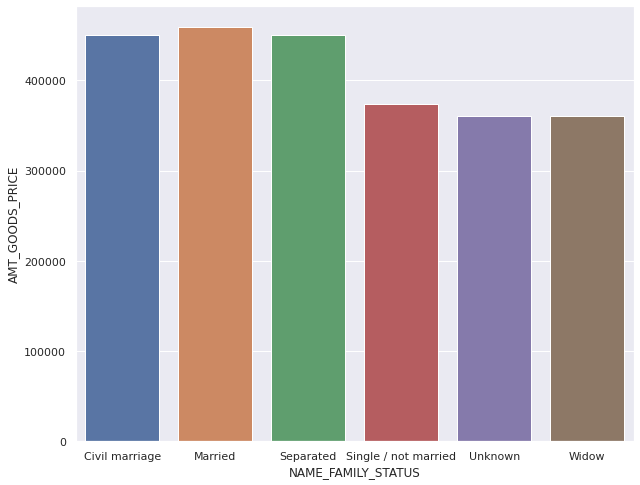

In [20]:
ax = sns.barplot(x="NAME_FAMILY_STATUS", y="AMT_GOODS_PRICE", data=temp_plt)

### BOXPLOT for "NAME_FAMILY_STATUS" and "AMT_GOODS_PRICE"

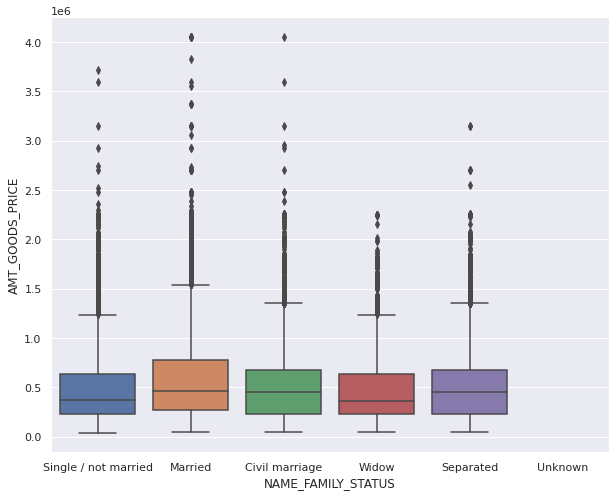

In [21]:
ax = sns.boxplot(x="NAME_FAMILY_STATUS", y="AMT_GOODS_PRICE", data=X_feature)

### STRIP PLOT for "NAME_FAMILY_STATUS" and "AMT_GOODS_PRICE"

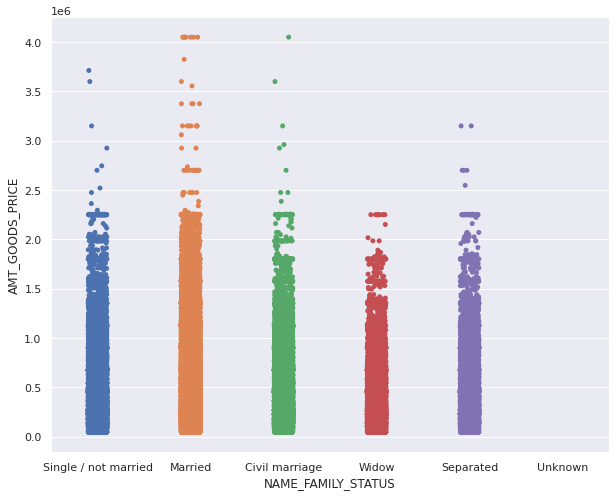

In [22]:
ax = sns.stripplot(x="NAME_FAMILY_STATUS", y="AMT_GOODS_PRICE", data=X_feature)

In [23]:
# def change_val(data_frame,target,plt_val,comp_val):
#     if data_frame[target] == np.inf:
#         return temp_plt[temp_plt[plt_val]==data_frame[plt_val]][target].values[0]
#     else:
#         return data_frame[target]


# for ncol in temp_data:
#     X_feature['AMT_GOODS_PRICE'] = X_feature['AMT_GOODS_PRICE'].fillna(np.inf)
#     if 'AMT_GOODS_PRICE' in ncol:
#         print(f"filling {ncol} with median")
#         X_feature['AMT_GOODS_PRICE'] = X_feature.apply(lambda a: change_val(a,"AMT_GOODS_PRICE","NAME_FAMILY_STATUS",""),axis=1)

def fill_category_value(a):
    if a['AMT_GOODS_PRICE'] == np.inf:
        return temp_plt[temp_plt['NAME_FAMILY_STATUS']==a['NAME_FAMILY_STATUS']]['AMT_GOODS_PRICE'].values[0]
    else:
        return a['AMT_GOODS_PRICE']

for ncol in temp_data:
    X_feature['AMT_GOODS_PRICE'] = X_feature['AMT_GOODS_PRICE'].fillna(np.inf)
    if 'AMT_GOODS_PRICE' in ncol:
        print("columns to be filled with category median is: {}".format(ncol))
        X_feature['AMT_GOODS_PRICE'] = X_feature.apply(lambda a: fill_category_value(a),axis=1)

columns to be filled with category median is: AMT_GOODS_PRICE


### Dropping one single row with ncolumn DAYS_LAST_PHONE_CHANGE and AMT_ANNUITY as null

In [24]:
X_feature.dropna(subset=['DAYS_LAST_PHONE_CHANGE'], inplace=True)
X_feature.dropna(subset=['AMT_ANNUITY'], inplace=True)
X_feature = X_feature.reset_index(drop=True)

### Checking highest correlated features with External Source to replace the null values with

#### Checking for correlation_with_EXT_2

In [25]:
temp_dataframe = pd.DataFrame()

for ncol_in_features in X_feature.columns.tolist():
    if X_feature[ncol_in_features].dtype == 'int':
        lis = [ncol_in_features, X_feature['EXT_SOURCE_2'].corr(X_feature[ncol_in_features])]
    else:
        lis = [ncol_in_features, X_feature['EXT_SOURCE_2'].corr(pd.DataFrame(le.fit_transform(X_feature[[ncol_in_features]]))[0])]
    temp_dataframe = temp_dataframe.append(pd.Series(lis),ignore_index=True)

temp_dataframe = temp_dataframe.rename(columns={0:'ncol_name',1:'correlation_with_EXT_2'})
temp_dataframe['correlation_with_EXT_2'] = abs(temp_dataframe['correlation_with_EXT_2'])
temp_dataframe.sort_values(by='correlation_with_EXT_2',ascending=False).head(6).tail(5)

,ncol_name,correlation_with_EXT_2
26,REGION_RATING_CLIENT,0.292903
27,REGION_RATING_CLIENT_W_CITY,0.288306
43,DAYS_LAST_PHONE_CHANGE,0.195766
5,AMT_INCOME_TOTAL,0.170547
70,TARGET,0.160471


In [26]:
region_rating_grouped = X_feature.groupby('REGION_RATING_CLIENT')['EXT_SOURCE_2'].median().reset_index()


def mod_external_source2(a):
    if a['EXT_SOURCE_2'] == np.inf:
        return region_rating_grouped[region_rating_grouped['REGION_RATING_CLIENT']==a['REGION_RATING_CLIENT']]['EXT_SOURCE_2'].values[0]
    else:
        return a['EXT_SOURCE_2']

X_feature['EXT_SOURCE_2'] = X_feature['EXT_SOURCE_2'].fillna(np.inf)
X_feature['EXT_SOURCE_2'] = X_feature.apply(lambda a: mod_external_source2(a),axis=1)

In [27]:
X_feature["EXT_SOURCE_3"]

0         0.139376
1              NaN
2         0.729567
3              NaN
4              NaN
            ...   
307493         NaN
307494         NaN
307495    0.218859
307496    0.661024
307497    0.113922
Name: EXT_SOURCE_3, Length: 307498, dtype: float64

In [28]:
tcd = pd.DataFrame()

for ncol in X_feature.columns.tolist():
    if X_feature[ncol].dtype == 'int':
        l = [ncol, X_feature['EXT_SOURCE_3'].corr(X_feature[ncol])]
    else:
        l = [ncol, X_feature['EXT_SOURCE_3'].corr(pd.DataFrame(le.fit_transform(X_feature[[ncol]]))[0])]
    tcd = tcd.append(pd.Series(l),ignore_index=True)
tcd = tcd.rename(columns={0:'ncol_name',1:'correlation_with_EXT_3'})
tcd['correlation_with_EXT_3'] = abs(tcd['correlation_with_EXT_3'])
tcd = tcd.sort_values(by='correlation_with_EXT_3',ascending=False).head(10).tail(9)
tcd

,ncol_name,correlation_with_EXT_3
15,DAYS_BIRTH,0.205474
70,TARGET,0.178929
18,DAYS_ID_PUBLISH,0.131598
20,FLAG_EMP_PHONE,0.115284
16,DAYS_EMPLOYED,0.113426
37,EXT_SOURCE_2,0.109728
17,DAYS_REGISTRATION,0.107570
5,AMT_INCOME_TOTAL,0.088906
36,ORGANIZATION_TYPE,0.087994


In [29]:
ext_source_data = X_feature[tcd['ncol_name'].tolist()+['EXT_SOURCE_3']]
for ncol in ext_source_data.columns.tolist():
    if ncol != 'EXT_SOURCE_3':
        ext_source_data[ncol] = le.fit_transform(X_feature[[ncol]])

ext_source3_train = ext_source_data[ext_source_data['EXT_SOURCE_3'].notnull()]
ext_source3_test = ext_source_data[ext_source_data['EXT_SOURCE_3'].isnull()]
ext_source3_train.shape, ext_source3_test.shape

((246535, 10), (60963, 10))

In [30]:
ex3_y_train = ext_source3_train[['EXT_SOURCE_3']]
ex3_X_train = ext_source3_train.drop(columns = ['EXT_SOURCE_3'])
ex3_X_test = ext_source3_test.drop(columns = ['EXT_SOURCE_3'])

In [31]:
model = lr.fit(ex3_X_train, ex3_y_train)
y_pred_ex3 = model.predict(ex3_X_test)

ex3_out = ex3_X_test
ex3_out['ex3_y'] = y_pred_ex3
ex3_out

,DAYS_BIRTH,TARGET,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,DAYS_EMPLOYED,EXT_SOURCE_2,DAYS_REGISTRATION,AMT_INCOME_TOTAL,ORGANIZATION_TYPE,ex3_y
1,8382,0,5876,1,11384,85079,14501,2064,39,0.472053
3,6142,0,3730,1,9533,90559,5854,1170,5,0.558360
4,5215,0,2709,1,9534,36021,11376,1019,37,0.548182
9,10676,0,2175,1,10553,110724,1373,1170,9,0.557395
14,10562,0,4111,1,12369,89028,15072,1659,53,0.486558
...,...,...,...,...,...,...,...,...,...,...
307471,12298,0,6132,1,12244,109216,13156,2398,5,0.437183
307488,12184,0,2387,1,11526,76369,14289,506,14,0.521215
307491,8442,0,5908,1,5318,68374,5889,1371,42,0.529196
307493,15818,0,4185,1,12336,96856,7231,1407,43,0.473263


In [32]:
ex3_out = ex3_out.reset_index().rename(columns={'index':'index_to_be_updated'})
for i in ex3_out['index_to_be_updated'].tolist():
    X_feature['EXT_SOURCE_3'].iloc[i] = ex3_out[ex3_out['index_to_be_updated']==i]['ex3_y'].values[0]

# Check null values in the training dataset

In [33]:
null_data = X_feature.isna().sum().reset_index().rename(columns = {'index':'ncol_name',0:'null_count'})
null_data['count_%'] = null_data['null_count']/len(X_feature)*100
null_data = null_data[null_data['count_%'] <= 30]
null_data['ncol_type'] = null_data['ncol_name'].apply(lambda x: X_feature[x].dtype)
null_data[null_data['count_%'] > 0]

,ncol_name,null_count,count_%,ncol_type


In [34]:
X_feature.isna().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
                             ..
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
TARGET                        0
Length: 71, dtype: int64

# Adding Additional relevant features 

In [35]:
X_feature['AMT_CREDIT_TO_ANNUITY_RATIO'] = X_feature['AMT_CREDIT'] / X_feature['AMT_ANNUITY']
X_feature['Tot_EXTERNAL_SOURCE'] = X_feature['EXT_SOURCE_2'] + X_feature['EXT_SOURCE_3']
X_feature['Salary_to_credit'] = X_feature['AMT_INCOME_TOTAL']/X_feature['AMT_CREDIT']
X_feature['Annuity_to_salary_ratio'] = X_feature['AMT_ANNUITY']/X_feature['AMT_INCOME_TOTAL']

In [36]:
X_feature['TARGET'].value_counts()

0    282673
1     24825
Name: TARGET, dtype: int64

In [37]:
X_dump = X_feature
X_dump.shape

(307498, 75)

In [45]:
X_dump.to_csv('/processed_training_data.csv', index=False)

In [46]:
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, path):
        # load the csv file as a dataframe
        df = read_csv(path).head(10000)
        num_attribs, cat_attribs = [], []
        
        num_types = ['int','float']
        [num_attribs.append(ncol) if df[ncol].dtype in () else cat_attribs.append(ncol) for ncol in df.columns.tolist()]
        
        le_dict = {}

        for ncol in df.columns.tolist():
            if df[ncol].dtype == 'object':
                df[ncol] = df[ncol].fillna("NULL")
                df[ncol] = le.fit_transform(df[ncol])
                le_dict['le_{}'.format(ncol)] = le

        # store the inputs and outputs
        self.X = df.drop(columns=['TARGET']).values[:, :]
        self.X = scaler.fit_transform(self.X)
        self.y = df['TARGET'].values[:]

        self.X = self.X.astype('float32')
        # label encode target and ensure the values are floats
        self.y = le.fit_transform(self.y)
        self.y = self.y.astype('float32')
        self.y = self.y.reshape((len(self.y), 1))

    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    # get indexes for train and test rows
    def get_splits(self, n_test=0.25):
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [train_size, test_size])

In [44]:
class MLP(Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # input to first hidden layer
        self.hidden1 = Linear(n_inputs, 35)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        # second hidden layer
        self.hidden2 = Linear(35, 15)
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        # third hidden layer
        self.hidden3 = Linear(15, 5)
        kaiming_uniform_(self.hidden3.weight, nonlinearity='relu')
        self.act3 = ReLU()
        # third hidden layer and output
        self.hidden4 = Linear(5, 1)
        xavier_uniform_(self.hidden4.weight)
        self.act4 = Sigmoid()

    # forward propagate input
    def forward(self, X):
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
         # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        # third hidden layer and output
        X = self.hidden3(X)
        X = self.act3(X)
        # third hidden layer and output
        X = self.hidden4(X)
        X = self.act4(X)
        return X

In [47]:
# prepare the dataset
def prepare_data(path):
    # load the dataset
    dataset = CSVDataset(path)
    # calculate split
    train, test = dataset.get_splits()
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl

# train the model
def train_model(train_dl, model):
    # define the optimization
    criterion = BCELoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    for epoch in range(200):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # plotting on tensorboard
            writer.add_scalar("Loss/train", loss, epoch)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()

# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = [], []
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # round to class values
        yhat = yhat.round()
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return acc

# Make a class prediction for one row of data

In [49]:
def predict_model(test_dl, model):
    temp_df = pd.DataFrame()
    predictions, actuals = [], []
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # round to class values
        yhat = yhat.round()
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions = predictions[0].reshape(len(predictions[0])).tolist()
    actuals = actuals[0].reshape(len(actuals[0])).tolist()
    temp_df['pred'] = predictions
    temp_df['actual'] = actuals
    return temp_df

# prepare the data
path = '/processed_training_data.csv'
train_dl, test_dl = prepare_data(path)
print(len(train_dl.dataset), len(test_dl.dataset))
# define the network
model = MLP(74)
# train the model
train_model(train_dl, model)
# getting test results
output_df = predict_model(test_dl, model)
# evaluate the model
acc = evaluate_model(test_dl, model)
print('Accuracy: %.3f' % acc)

writer.flush()
writer.close()

7500 2500
Accuracy: 0.902


# pytorch mlp for binary classification

In [51]:
# dataset definition
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, path):
        # load the csv file as a dataframe
        df = read_csv(path).head(50000)

        num_attribs, cat_attribs = [], []

        for ncol in df.columns.tolist():
            if df[ncol].dtype in (['int','float']):
                num_attribs.append(ncol)
            else:
                cat_attribs.append(ncol)
                
        le_dict = {}
        for ncol in df.columns.tolist():
            if df[ncol].dtype == 'object':
                df[ncol] = df[ncol].fillna("NULL")
                df[ncol] = le.fit_transform(df[ncol])
                le_dict['le_{}'.format(ncol)] = le

        # store the inputs and outputs
        self.X = scaler.fit_transform(df.drop(columns=['TARGET']).values[:, :])
        self.y = df['TARGET'].values[:]

        self.X = self.X.astype('float32')
        # label encode target and ensure the values are floats
        self.y = le.fit_transform(self.y).astype('float32')
        self.y = self.y.reshape((len(self.y), 1))

    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    # get indexes for train and test rows
    def get_splits(self, n_test=0.25):
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [train_size, test_size])


# MLP model definition

In [52]:
class MLP(Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # input to first hidden layer
        self.hidden1 = Linear(n_inputs, 10)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        # second hidden layer and output
        self.hidden2 = Linear(10, 1)
        xavier_uniform_(self.hidden2.weight)
        self.act2 = Sigmoid()

    # forward propagate input
    def forward(self, X):
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
         # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        return X

# prepare the dataset
def prepare_data(path):
    # load the dataset
    dataset = CSVDataset(path)
    print(dataset)
    # calculate split
    train, test = dataset.get_splits()
    print(train)
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl

# train the model
def train_model(train_dl, model):
    # define the optimization
    criterion = BCELoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    for epoch in range(200):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # plotting on tensorboard
            writer.add_scalar("Loss/train", loss, epoch)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()

# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = [], []
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # round to class values
        yhat = yhat.round()
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return acc

# make a class prediction for one row of data
def predict_model(test_dl, model):
    temp_df = pd.DataFrame()
    predictions, actuals = [], []
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # round to class values
        yhat = yhat.round()
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions = predictions[0].reshape(len(predictions[0])).tolist()
    actuals = actuals[0].reshape(len(actuals[0])).tolist()
    temp_df['pred'] = predictions
    temp_df['actual'] = actuals
    return temp_df

In [55]:
# prepare the data #change
path = '/processed_training_data.csv'
train_dl, test_dl = prepare_data(path)
print(len(train_dl.dataset), len(test_dl.dataset))

37500 12500


In [56]:
test_dataset = pd.read_csv('/application_test.csv') #change
test_dataset = test_dataset[list(set(read_csv(path).columns.tolist())-set(['Annuity_to_salary_ratio', 'AMT_CREDIT_TO_ANNUITY_RATIO', 'TARGET', 'Tot_EXTERNAL_SOURCE', 'Salary_to_credit']))]
test_dataset.head()

,FLAG_DOCUMENT_5,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,FLAG_DOCUMENT_14,FLAG_EMAIL,FLAG_DOCUMENT_19,FLAG_DOCUMENT_18,FLAG_DOCUMENT_7,FLAG_PHONE,CODE_GENDER,...,DAYS_LAST_PHONE_CHANGE,FLAG_OWN_CAR,AMT_INCOME_TOTAL,REGION_RATING_CLIENT,FLAG_DOCUMENT_12,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_WORK_PHONE,NAME_INCOME_TYPE,FLAG_DOCUMENT_9
0,0,0.0,0.0,0,1,0,0,0,0,F,...,-1740.0,N,135000.0,2,0,1,0,0,Working,0
1,0,0.0,0.0,0,0,0,0,0,0,M,...,0.0,N,99000.0,2,0,1,0,0,Working,0
2,0,1.0,0.0,0,0,0,0,0,0,M,...,-856.0,Y,202500.0,2,0,1,0,0,Working,0
3,0,0.0,0.0,0,0,0,0,0,1,F,...,-1805.0,N,315000.0,2,0,1,0,0,Working,0
4,0,NaN,NaN,0,0,0,0,0,0,M,...,-821.0,Y,180000.0,2,0,1,0,1,Working,0


In [57]:
test_dataset['AMT_CREDIT_TO_ANNUITY_RATIO'] = test_dataset['AMT_CREDIT'] / test_dataset['AMT_ANNUITY']
test_dataset['Tot_EXTERNAL_SOURCE'] = test_dataset['EXT_SOURCE_2'] + test_dataset['EXT_SOURCE_3']
test_dataset['Salary_to_credit'] = test_dataset['AMT_INCOME_TOTAL']/test_dataset['AMT_CREDIT']
test_dataset['Annuity_to_salary_ratio'] = test_dataset['AMT_ANNUITY']/test_dataset['AMT_INCOME_TOTAL']

In [58]:
test_dataset.head()

,FLAG_DOCUMENT_5,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,FLAG_DOCUMENT_14,FLAG_EMAIL,FLAG_DOCUMENT_19,FLAG_DOCUMENT_18,FLAG_DOCUMENT_7,FLAG_PHONE,CODE_GENDER,...,FLAG_DOCUMENT_12,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_WORK_PHONE,NAME_INCOME_TYPE,FLAG_DOCUMENT_9,AMT_CREDIT_TO_ANNUITY_RATIO,Tot_EXTERNAL_SOURCE,Salary_to_credit,Annuity_to_salary_ratio
0,0,0.0,0.0,0,1,0,0,0,0,F,...,0,1,0,0,Working,0,27.664697,0.949174,0.237342,0.152300
1,0,0.0,0.0,0,0,0,0,0,0,M,...,0,1,0,0,Working,0,12.824870,0.724617,0.444409,0.175455
2,0,1.0,0.0,0,0,0,0,0,0,M,...,0,1,0,0,Working,0,9.505482,1.310778,0.305308,0.344578
3,0,0.0,0.0,0,0,0,0,0,1,F,...,0,1,0,0,Working,0,32.130726,1.122381,0.200000,0.155614
4,0,NaN,NaN,0,0,0,0,0,0,M,...,0,1,0,1,Working,0,19.506034,NaN,0.287770,0.178150


In [59]:
test_dataset.shape

(48744, 74)

In [60]:
num_attribs, cat_attribs = [], []

for ncol in test_dataset.columns.tolist():
    if test_dataset[ncol].dtype in (['int','float']):
        num_attribs.append(ncol)
    else:
        cat_attribs.append(ncol)
        
le_dict = {}
for ncol in test_dataset.columns.tolist():
    if test_dataset[ncol].dtype == 'object':
        le = LabelEncoder()
        test_dataset[ncol] = test_dataset[ncol].fillna("NULL")
        test_dataset[ncol] = le.fit_transform(test_dataset[ncol])
        le_dict['le_{}'.format(ncol)] = le

In [61]:
test_dataset.head()

,FLAG_DOCUMENT_5,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,FLAG_DOCUMENT_14,FLAG_EMAIL,FLAG_DOCUMENT_19,FLAG_DOCUMENT_18,FLAG_DOCUMENT_7,FLAG_PHONE,CODE_GENDER,...,FLAG_DOCUMENT_12,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_WORK_PHONE,NAME_INCOME_TYPE,FLAG_DOCUMENT_9,AMT_CREDIT_TO_ANNUITY_RATIO,Tot_EXTERNAL_SOURCE,Salary_to_credit,Annuity_to_salary_ratio
0,0,0.0,0.0,0,1,0,0,0,0,0,...,0,1,0,0,6,0,27.664697,0.949174,0.237342,0.152300
1,0,0.0,0.0,0,0,0,0,0,0,1,...,0,1,0,0,6,0,12.824870,0.724617,0.444409,0.175455
2,0,1.0,0.0,0,0,0,0,0,0,1,...,0,1,0,0,6,0,9.505482,1.310778,0.305308,0.344578
3,0,0.0,0.0,0,0,0,0,0,1,0,...,0,1,0,0,6,0,32.130726,1.122381,0.200000,0.155614
4,0,NaN,NaN,0,0,0,0,0,0,1,...,0,1,0,1,6,0,19.506034,NaN,0.287770,0.178150


In [62]:
test_dataset = test_dataset.values[:, :]
test_dataset = scaler.fit_transform(test_dataset)
test_data_dl = DataLoader(test_dataset, batch_size=32, shuffle=False)
test_data_dl

In [63]:
for i,j in enumerate(test_data_dl):
    print(i,j)

Streaming output truncated to the last 5000 lines.
907 tensor([[0.0000,    nan,    nan,  ...,    nan, 0.0307, 0.1596],
        [0.0000, 0.1429, 0.0000,  ..., 0.8975, 0.0155, 0.1747],
        [0.0000, 0.1429, 0.0000,  ..., 0.5430, 0.0781, 0.0419],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.5277, 0.0248, 0.1249],
        [0.0000, 0.0000, 0.0000,  ..., 0.7509, 0.0169, 0.1445],
        [0.0000, 0.1429, 0.0000,  ..., 0.4182, 0.0295, 0.0652]],
       dtype=torch.float64)
908 tensor([[0.0000, 0.0000, 0.0000,  ..., 0.7466, 0.0434, 0.0393],
        [0.0000, 0.2857, 0.0000,  ..., 0.3106, 0.0508, 0.0450],
        [0.0000, 0.0000, 0.0000,  ..., 0.7304, 0.0235, 0.1664],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.4624, 0.0346, 0.0921],
        [0.0000, 0.1429, 0.0000,  ...,    nan, 0.0368, 0.0712],
        [0.0000, 0.0000, 0.0000,  ..., 0.7288, 0.0809, 0.0513]],
       dtype=torch.float64)
909 tensor([[0.0000, 0.0000, 0.0000,  ..., 0.3536, 0.0132, 0.1552],
        [0.0000, 0.14

In [73]:
output_df = pd.DataFrame()
predictions, actuals = [], []
for i, (inputs, targets) in enumerate(test_dl):
    # evaluate the model on the test set
    yhat = model(inputs)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    actual = targets.numpy()
    actual = actual.reshape((len(actual), 1))
    # round to class values
    yhat = yhat.round()
    # store
    predictions.append(yhat)
    actuals.append(actual)
predictions = predictions[0].reshape(len(predictions[0])).tolist()
actuals = actuals[0].reshape(len(actuals[0])).tolist()
output_df['pred'] = predictions
output_df['actual'] = actuals

# Dataset definition

In [76]:
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, path):
        # load the csv file as a dataframe
        df = read_csv(path).head(1000)

        num_attribs, cat_attribs = [], []

        for ncol in df.columns.tolist():
            if df[ncol].dtype in (['int','float']):
                num_attribs.append(ncol)
            else:
                cat_attribs.append(ncol)
                
        le_dict = dict()
        le = LabelEncoder()
        for ncol in df.columns.tolist():
            if df[ncol].dtype == 'object':
                
                df[ncol] = df[ncol].fillna("NULL")
                df[ncol] = le.fit_transform(df[ncol])
                le_dict['le_{}'.format(ncol)] = le

        # store the inputs and outputs
        # self.X = df.drop(columns=['DAYS_EMPLOYED']).values[:, :]
        # self.y = df['DAYS_EMPLOYED'].values[:]
        self.X = df.drop(columns=['DAYS_EMPLOYED']).head(1000)
        self.y = df['DAYS_EMPLOYED'].head(1000)

        self.X = self.X.astype('float32')
        # label encode target and ensure the values are floats
        self.y = le.fit_transform(self.y)
        self.y = self.y.astype('float32')
        self.y = self.y.reshape((len(self.y), 1))

    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # get a row at an index
   # def __getitem__(self, idx):
     #   return [self.X[idx], self.y[idx]]

    # get indexes for train and test rows
    def get_splits(self, n_test = 0.25):
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [train_size, test_size])

# model definition
class MLP(Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # input to first hidden layer
        self.hidden1 = Linear(n_inputs, 140)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        # second hidden layer
        self.hidden2 = Linear(140, 20)
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        # third hidden layer and output
        self.hidden3 = Linear(20, 1)
        xavier_uniform_(self.hidden3.weight)
        self.act3 = Sigmoid()

    # forward propagate input
    def forward(self, X):
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
         # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        # third hidden layer and output
        X = self.hidden3(X)
        X = self.act3(X)
        return X

# prepare the dataset
def prepare_data(path):
    # load the dataset
    dataset = CSVDataset(path)
    # calculate split
    train, test = dataset.get_splits()
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl

# train the model
def train_model(train_dl, model):
    # define the optimization
    criterion = MSELoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    for epoch in range(100):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()

# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = [], []
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # round to class values
        yhat = yhat.round()
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return acc

# make a class prediction for one row of data
def predict_model(test_dl, model):
    temp_df = pd.DataFrame()
    predictions, actuals = [], []
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # round to class values
        yhat = yhat.round()
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions = predictions[0].reshape(len(predictions[0])).tolist()
    actuals = actuals[0].reshape(len(actuals[0])).tolist()
    temp_df['pred'] = predictions
    temp_df['actual'] = actuals
    return temp_df

# prepare the data
path = '/processed_training_data.csv'
train_dl, test_dl = prepare_data(path)
print(len(train_dl.dataset), len(test_dl.dataset))
# define the network
model = MLP(74)
# train the model
train_model(train_dl, model)
# getting test results
output_df = predict_model(test_dl, model)
# evaluate the model
acc = evaluate_model(test_dl, model)
print('Accuracy: %.3f' % acc)